In [1]:
import sys
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np
import pickle
from IPython.display import  Audio
import os
from config import SAMPLE_RATE
import scipy.signal
from audio import audio
from IPython.display import set_matplotlib_formats
from scipy import signal

set_matplotlib_formats('retina')
plt.style.use('seaborn')


In [33]:
y, sr = librosa.load(librosa.ex('trumpet'))
# Get the magnitude spectrogram
S = np.abs(librosa.stft(y, n_fft=512))
# Invert using Griffin-Lim
y_inv = librosa.griffinlim(S)
# Invert without estimating phase
y_istft = librosa.istft(S)


In [34]:
Audio(y, rate=sr)

In [36]:
S.shape

(257, 919)

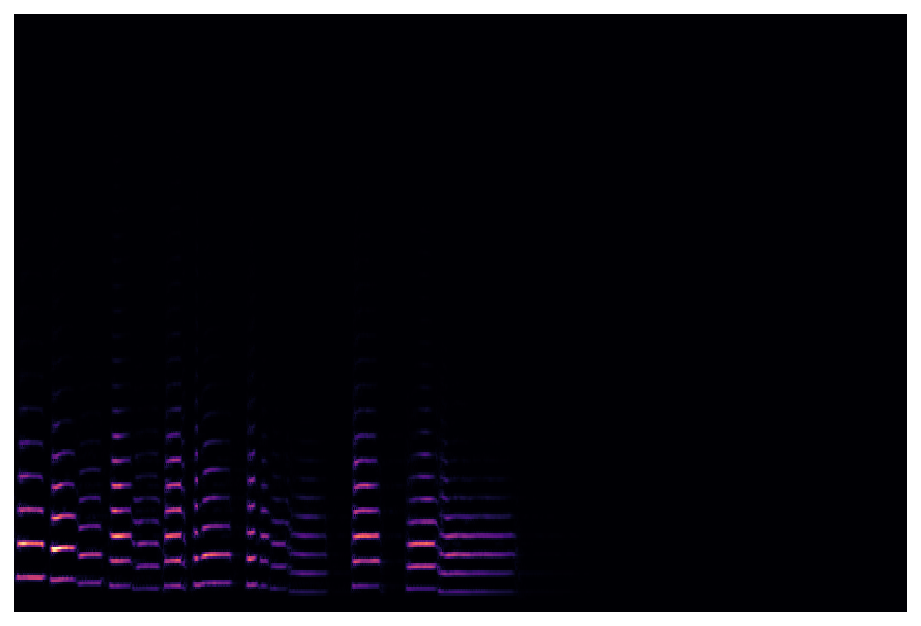

In [37]:
S_db = librosa.power_to_db(S)
librosa.display.specshow(S)

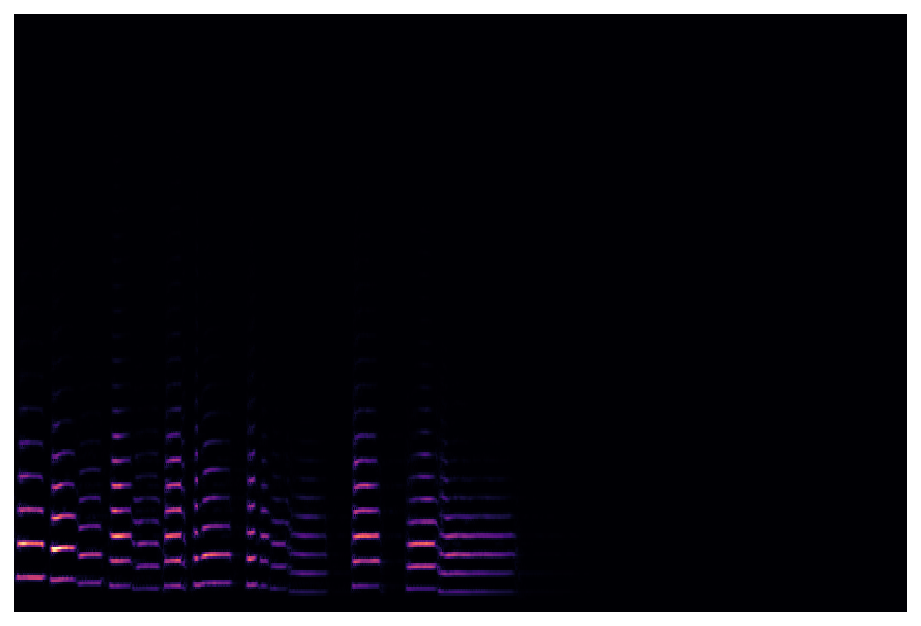

In [38]:
S_db = librosa.power_to_db(S)
librosa.display.specshow(S)

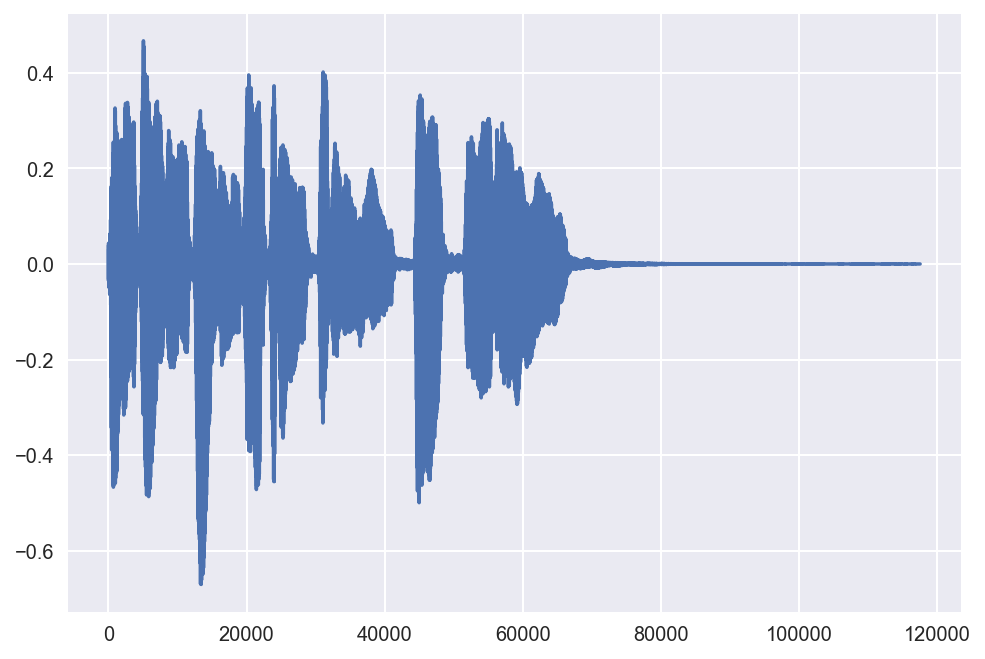

In [41]:
S = librosa.db_to_power(S_db)
y_inv = librosa.griffinlim(S)
plt.plot(y_inv)
plt.show()

In [40]:
Audio(y_inv, rate=sr)

In [30]:
S.shape[0]/y.shape[0]

0.008715912279657486

In [ ]:
t = np.linspace(0, 10, 2000, endpoint=False)
sig  = np.cos(2 * np.pi * 2 * t) + signal.gausspulse(t - 5.0, fc=1)

In [ ]:
widths = np.arange(1, 220)
cwtmatr = signal.cwt(sig, signal.ricker, widths)
plt.imshow(cwtmatr, extent=[-1, 1, 1, 220], cmap=plt.cm.inferno , aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.grid(None)
plt.show()

In [ ]:
f, t, Sxx = scipy.signal.spectrogram(sig, fs=200)
plt.pcolormesh(t, f, Sxx)

In [ ]:
audio.plot_spectrogram_mel(sig, 1000)

In [71]:
%load_ext autoreload

%autoreload 2

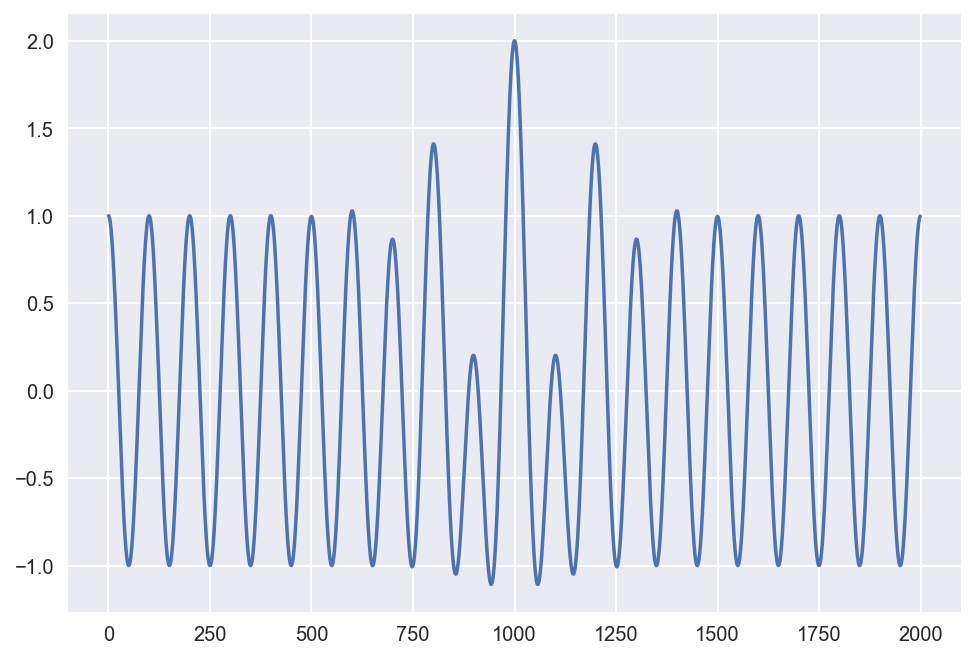

In [73]:
plt.plot(sig);

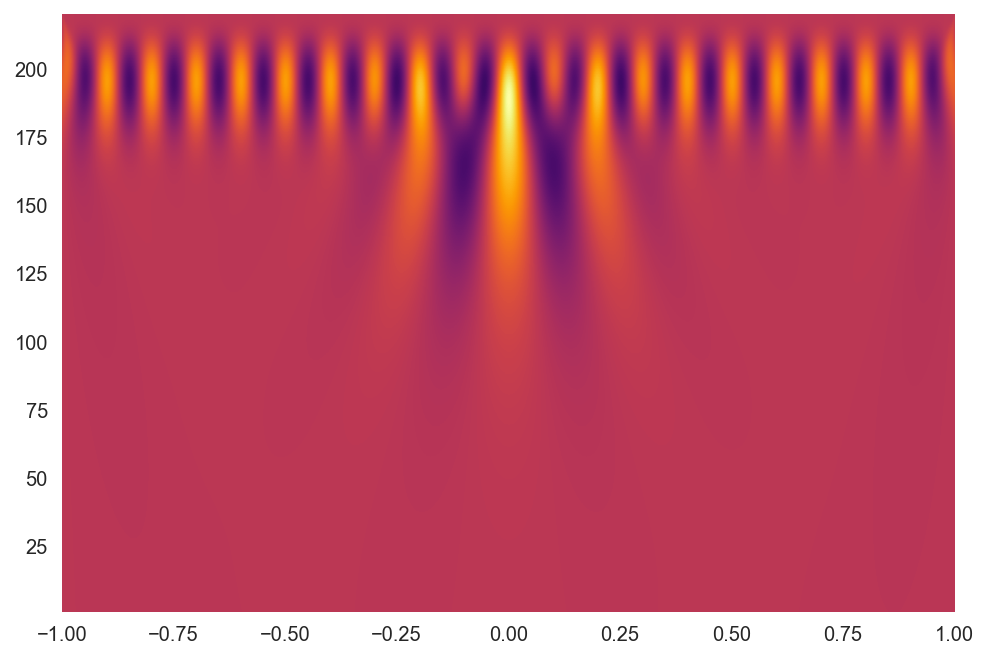

In [74]:
widths = np.arange(1, 220)
cwtmatr = signal.cwt(sig, signal.ricker, widths)
plt.imshow(cwtmatr, extent=[-1, 1, 1, 220], cmap=plt.cm.inferno , aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.grid(None)
plt.show()

/Users/nemo/Documents/projects/Signal_processing/VoiceVAE/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


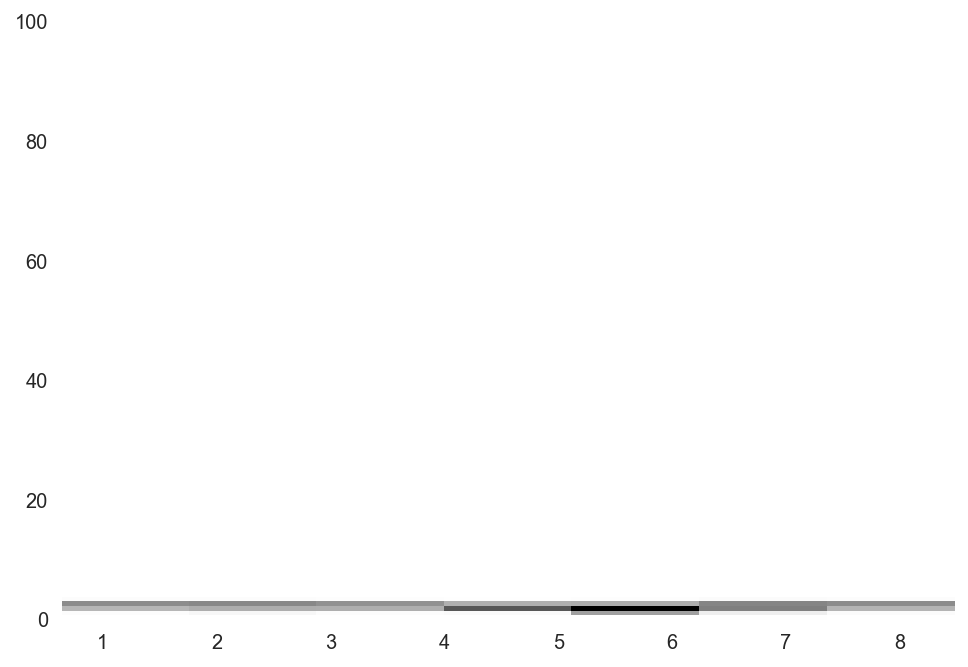

In [75]:
f, t, Sxx = scipy.signal.spectrogram(sig, fs=200)
plt.pcolormesh(t, f, Sxx)

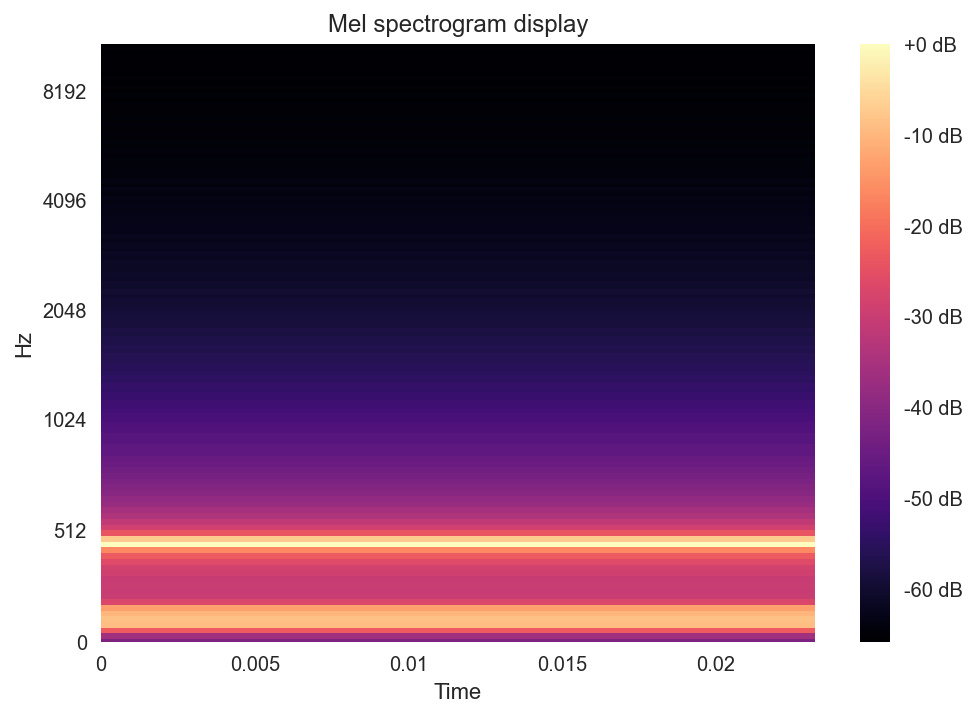

In [21]:
audio.plot_spectrogram_mel(sig, 1000)

In [2]:
%load_ext autoreload

%autoreload 2

In [3]:
dataset = pickle.load(open('data/data_wavs_compiled.pkl', 'rb'))


In [4]:
Audio(dataset[1], rate=SAMPLE_RATE)

/Users/nemo/Documents/projects/Signal_processing/VoiceVAE/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  after removing the cwd from sys.path.


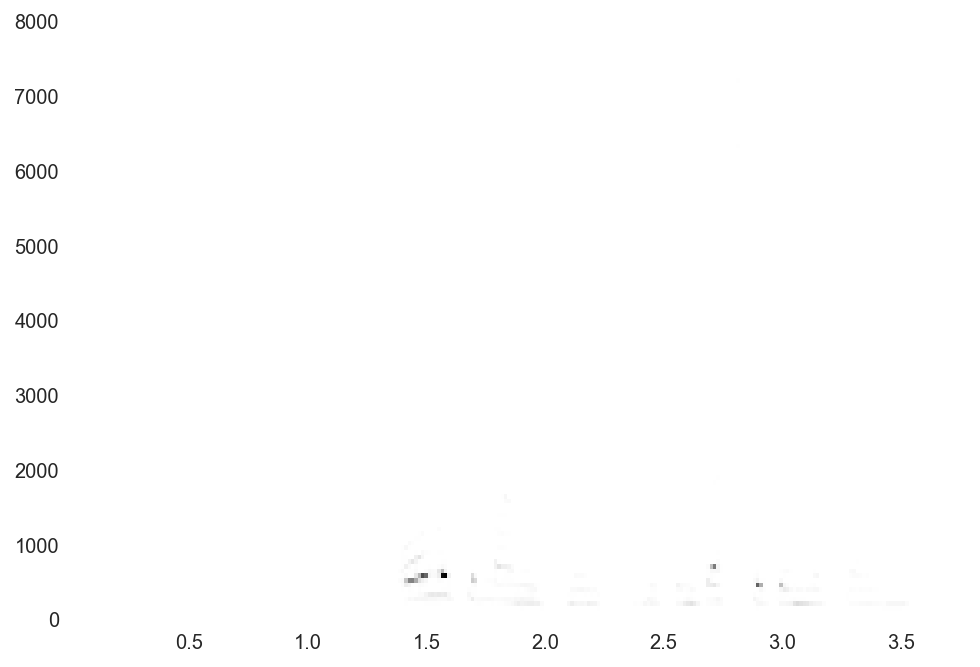

In [5]:
wav = dataset[1]
f, t, Sxx = scipy.signal.spectrogram(wav, fs=SAMPLE_RATE)

plt.pcolormesh(t, f, Sxx)

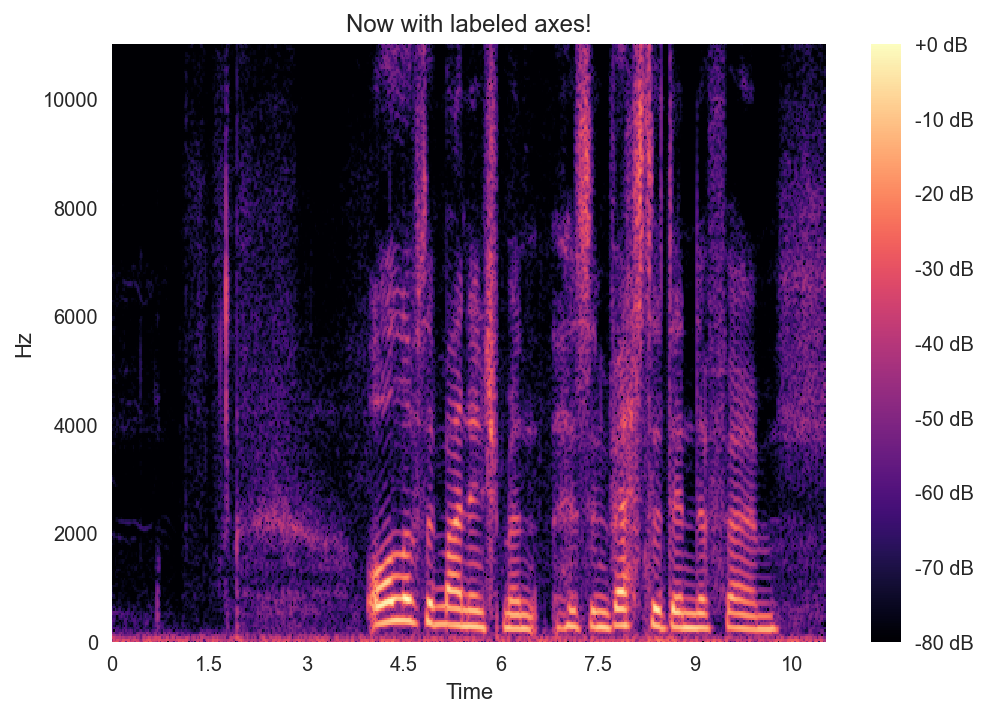

In [6]:
audio.plot_spectrogram(wav, SAMPLE_RATE)


/Users/nemo/Documents/projects/Signal_processing/VoiceVAE/venv/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/Users/nemo/Documents/projects/Signal_processing/VoiceVAE/venv/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


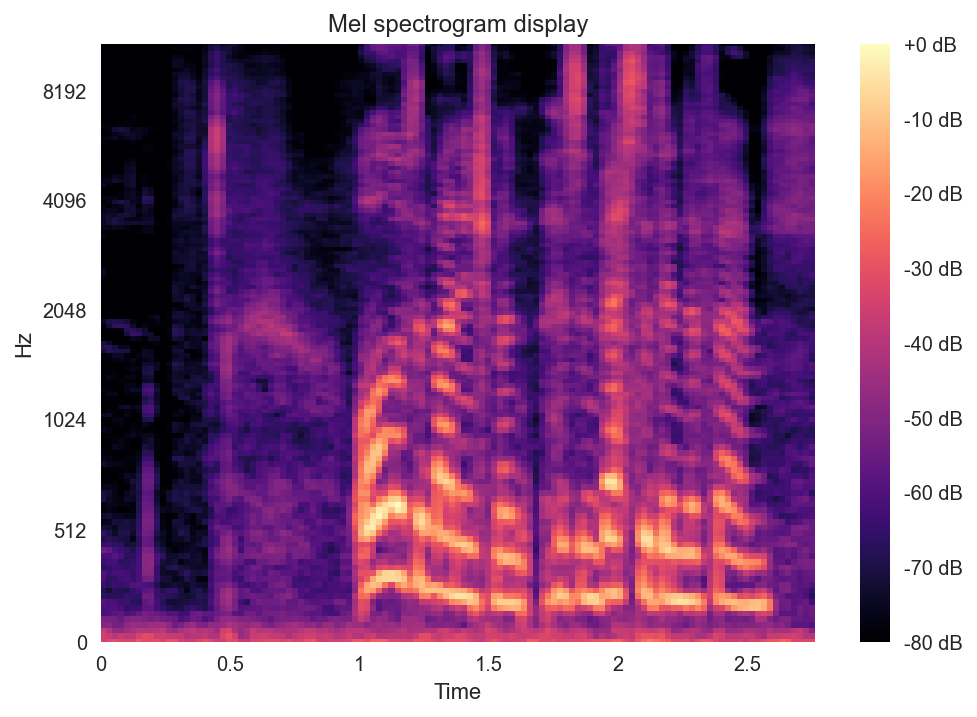

In [7]:
audio.plot_spectrogram_mel(wav, SAMPLE_RATE)

In [8]:
wav, sr = audio.load_wav('/Users/nemo/Downloads/a_y.m4a', sr=16000)

/Users/nemo/Documents/projects/Signal_processing/VoiceVAE/venv/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [9]:
Audio(wav, rate=sr)

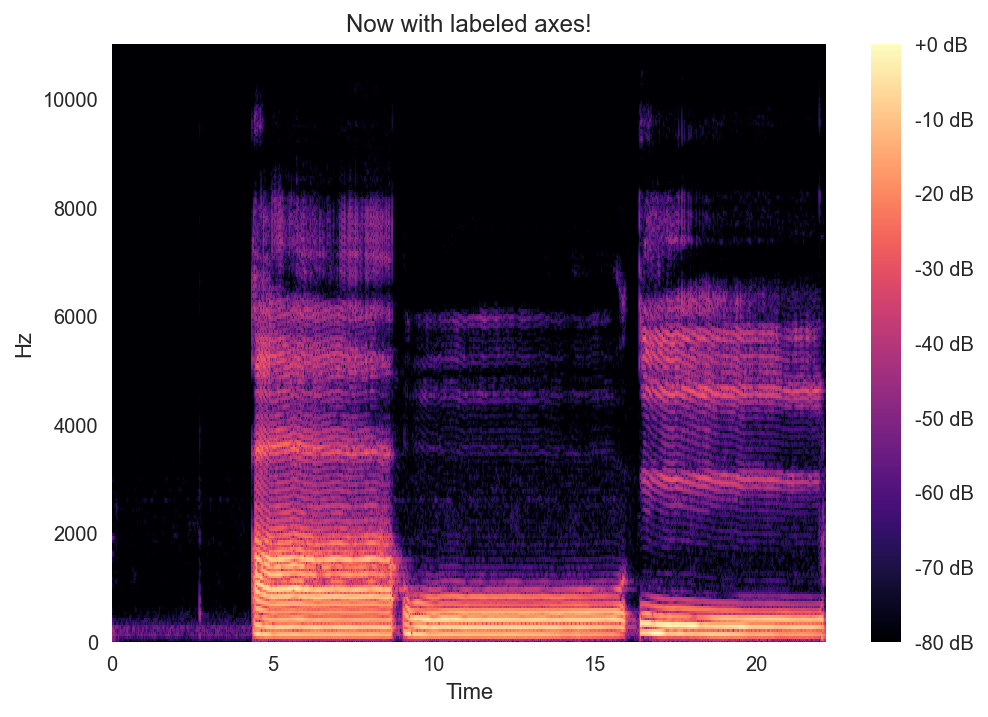

In [10]:
audio.plot_spectrogram(wav, sr)

/Users/nemo/Documents/projects/Signal_processing/VoiceVAE/venv/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


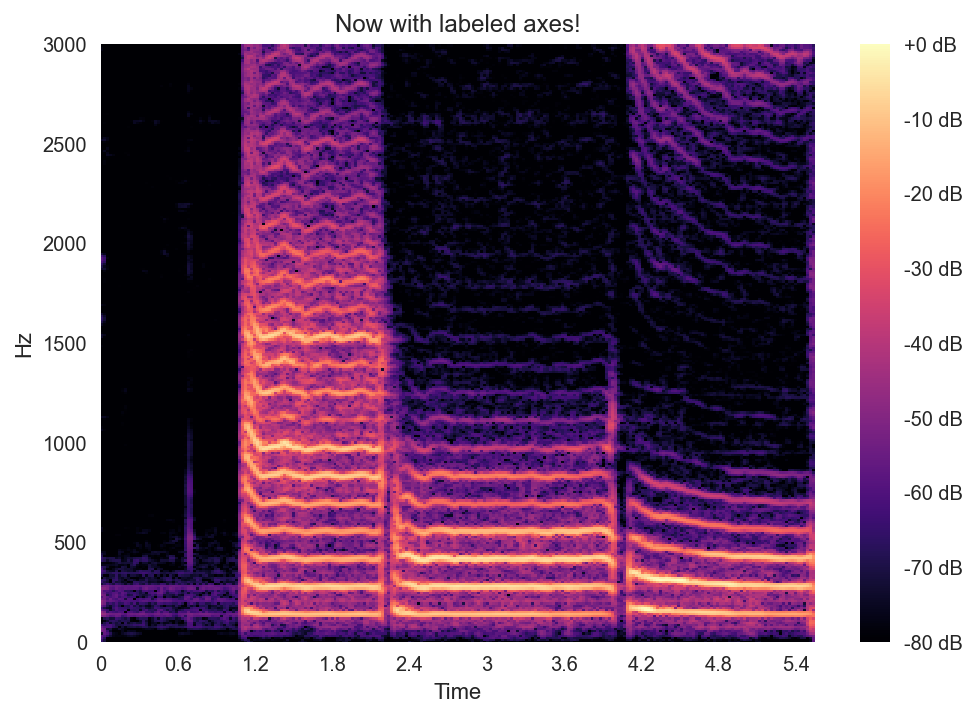

In [11]:
wav, sr = audio.load_wav('/Users/nemo/Downloads/a_y.m4a', sr=16000)
D = librosa.stft(wav, n_fft=2048)  # STFT of y
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, x_axis='time', y_axis='linear', ax=ax)
ax.set(title='Now with labeled axes!')
fig.colorbar(img, ax=ax, format="%+2.f dB")
plt.ylim([0, 3000])
plt.show()

/Users/nemo/Documents/projects/Signal_processing/VoiceVAE/venv/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


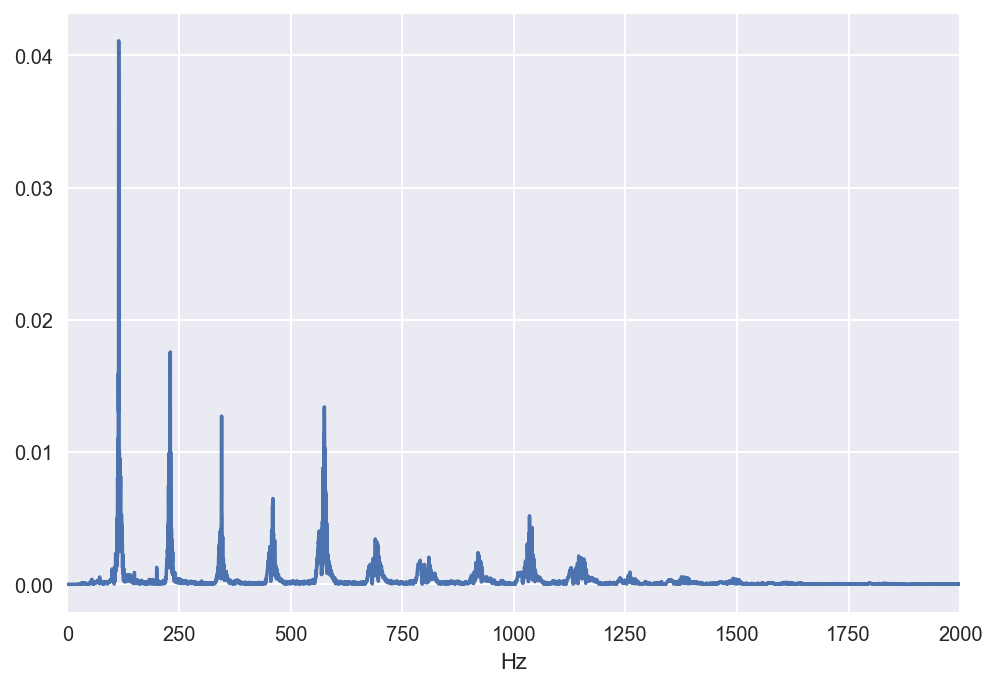

In [12]:
wav, sr = audio.load_wav('/Users/nemo/Downloads/a.m4a', sr=16000)
from scipy.fft import fft, fftfreq
# Number of sample points
N = len(wav)
# sample spacing
T = 1/sr
yf = fft(wav)
xf = fftfreq(N, T)[:N//2]
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.xlim([0, 2000])
plt.xlabel('Hz')
plt.show()

/Users/nemo/Documents/projects/Signal_processing/VoiceVAE/venv/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


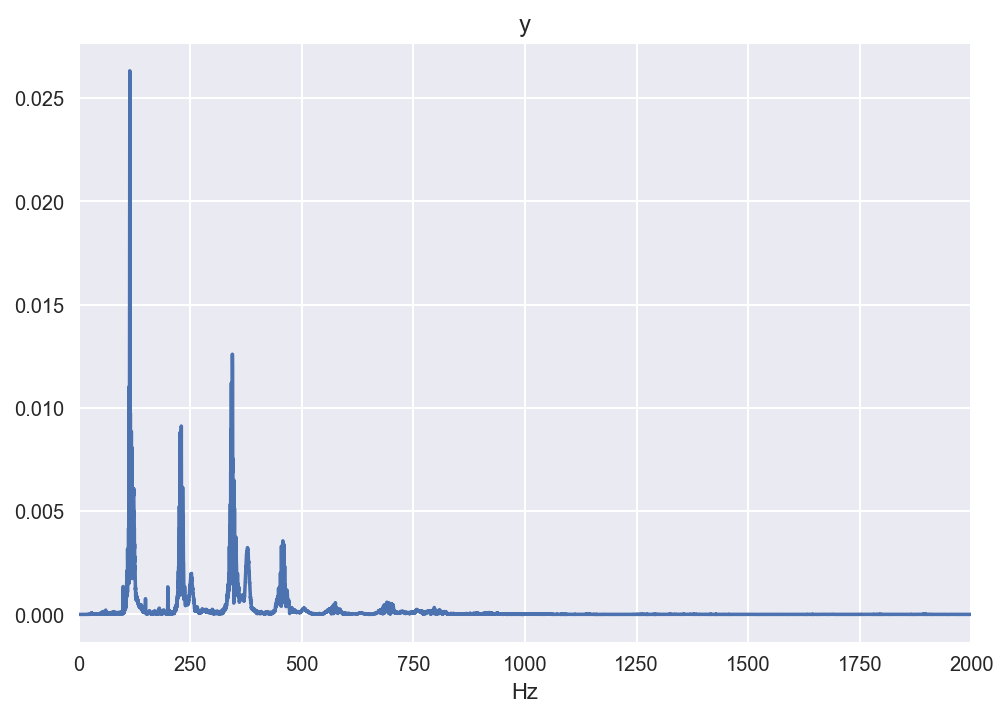

In [13]:
sound = 'y'
wav, sr = audio.load_wav(f'/Users/nemo/Downloads/{sound}.m4a', sr=16000)
from scipy.fft import fft, fftfreq
# Number of sample points
N = len(wav)
# sample spacing
T = 1/sr
yf = fft(wav)
xf = fftfreq(N, T)[:N//2]
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.xlim([0, 2000])
plt.title(sound)
plt.xlabel('Hz')
plt.show()




/Users/nemo/Documents/projects/Signal_processing/VoiceVAE/venv/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


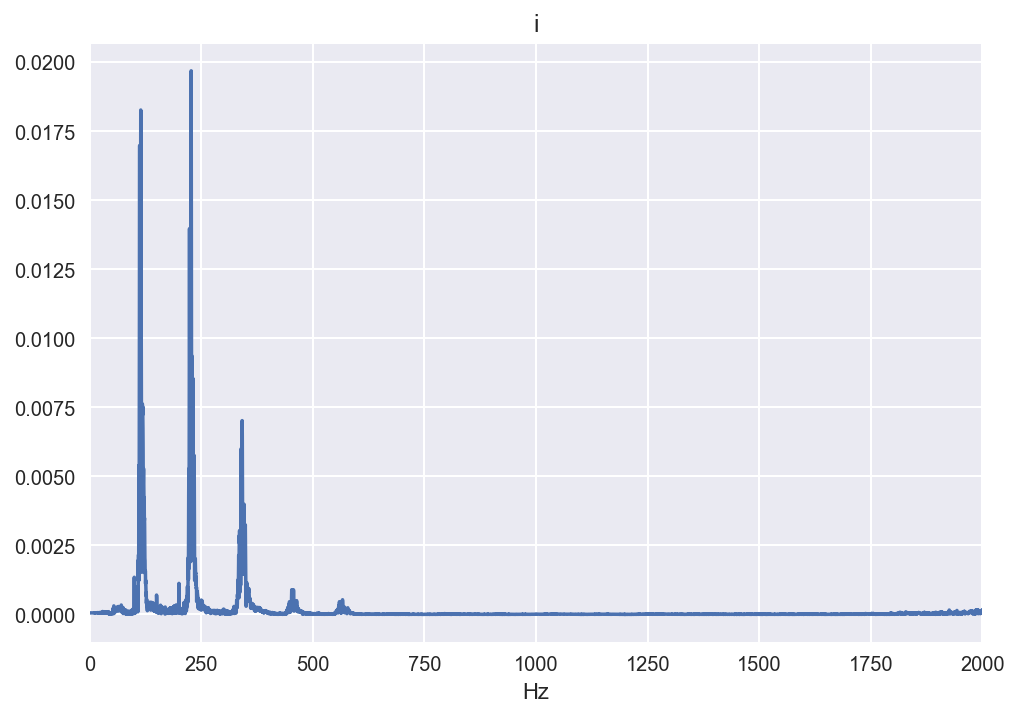

In [14]:
sound = 'i'
wav, sr = audio.load_wav(f'/Users/nemo/Downloads/{sound}.m4a', sr=16000)
from scipy.fft import fft, fftfreq
# Number of sample points
N = len(wav)
# sample spacing
T = 1/sr
yf = fft(wav)
xf = fftfreq(N, T)[:N//2]
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.xlim([0, 2000])
plt.title(sound)
plt.xlabel('Hz')
plt.show()

/Users/nemo/Documents/projects/Signal_processing/VoiceVAE/venv/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


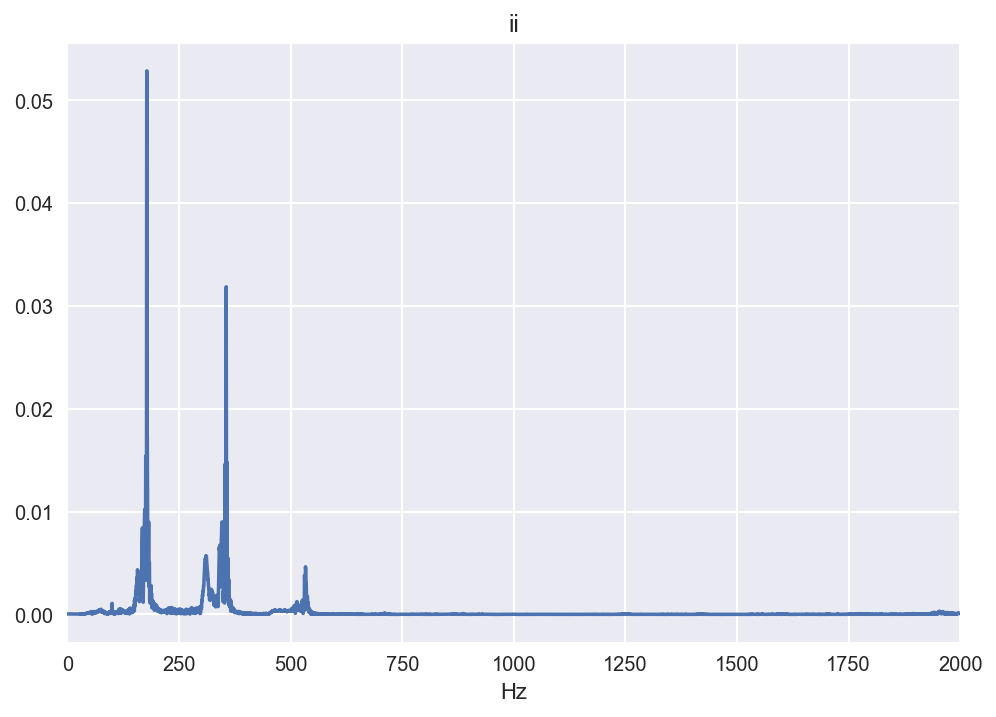

In [61]:
sound = 'ii'
wav, sr = audio.load_wav(f'/Users/nemo/Downloads/{sound}.m4a', sr=16000)
from scipy.fft import fft, fftfreq
# Number of sample points
N = len(wav)
# sample spacing
T = 1/sr
yf = fft(wav)
xf = fftfreq(N, T)[:N//2]
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.xlim([0, 2000])
plt.title(sound)
plt.xlabel('Hz')
plt.show()

/Users/nemo/Documents/projects/Signal_processing/VoiceVAE/venv/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


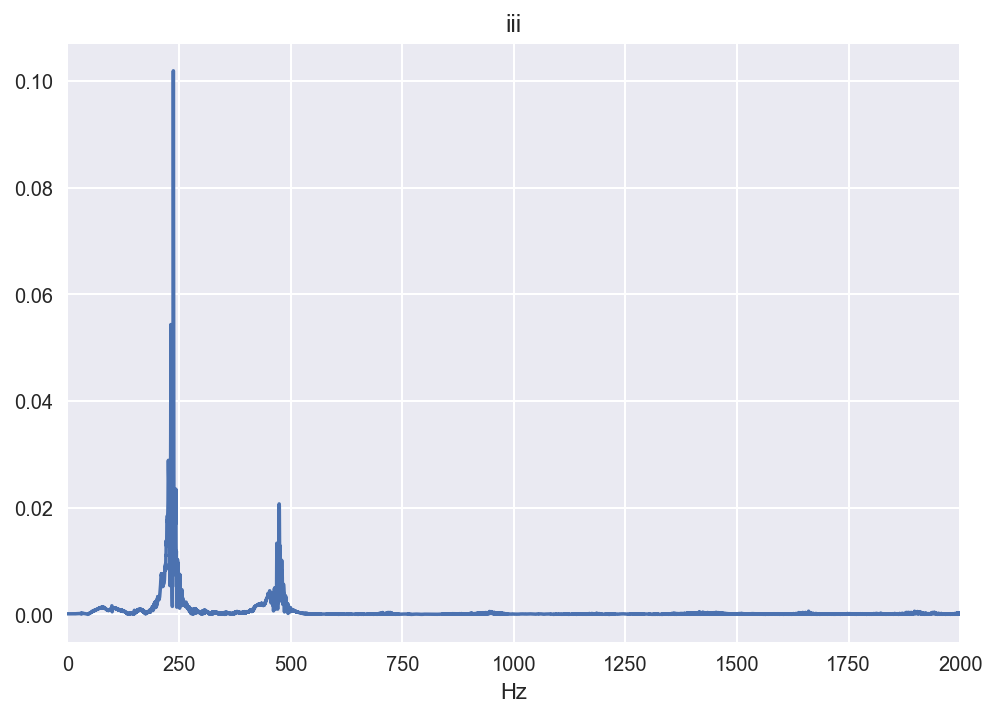

In [62]:
sound = 'iii'
wav, sr = audio.load_wav(f'/Users/nemo/Downloads/{sound}.m4a', sr=16000)
from scipy.fft import fft, fftfreq
# Number of sample points
N = len(wav)
# sample spacing
T = 1/sr
yf = fft(wav)
xf = fftfreq(N, T)[:N//2]
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.xlim([0, 2000])
plt.title(sound)
plt.xlabel('Hz')
plt.show()




/Users/nemo/Documents/projects/Signal_processing/VoiceVAE/venv/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


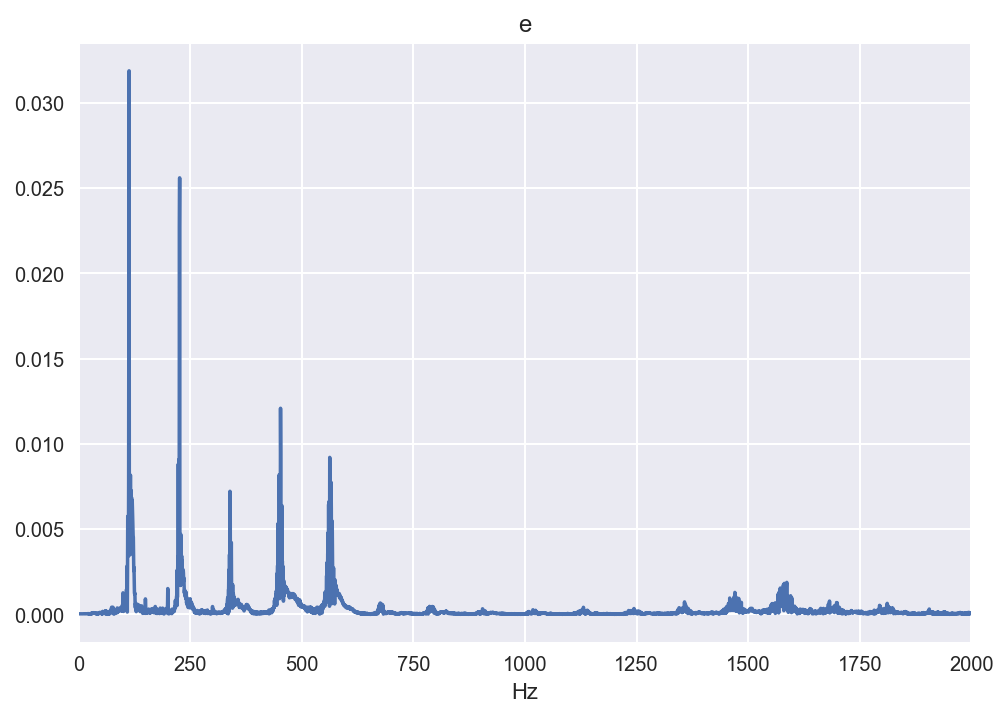

In [56]:
sound = 'e'
wav, sr = audio.load_wav(f'/Users/nemo/Downloads/{sound}.m4a', sr=16000)
from scipy.fft import fft, fftfreq
# Number of sample points
N = len(wav)
# sample spacing
T = 1/sr
yf = fft(wav)
xf = fftfreq(N, T)[:N//2]
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.xlim([0, 2000])
plt.title(sound)
plt.xlabel('Hz')
plt.show()




/Users/nemo/Documents/projects/Signal_processing/VoiceVAE/venv/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


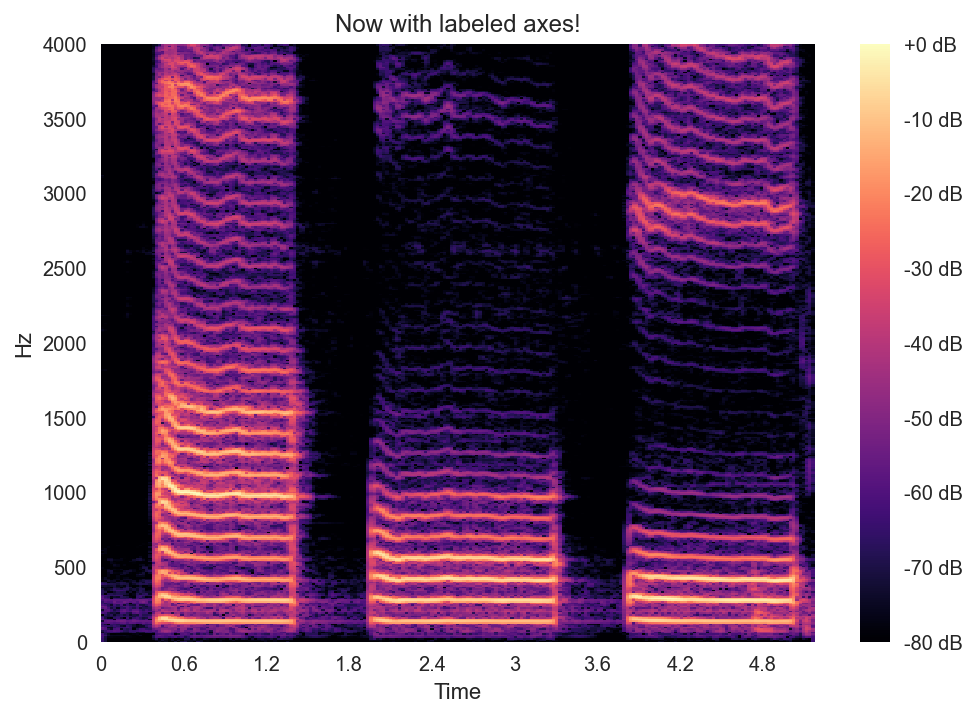

In [64]:


wav, sr = audio.load_wav('/Users/nemo/Downloads/a_y_i.m4a', sr=16000)
D = librosa.stft(wav, n_fft=2048)  # STFT of y
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, x_axis='time', y_axis='linear', ax=ax)
ax.set(title='Now with labeled axes!')
fig.colorbar(img, ax=ax, format="%+2.f dB")
plt.ylim([0, 4000])
plt.show()

/Users/nemo/Documents/projects/Signal_processing/VoiceVAE/venv/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


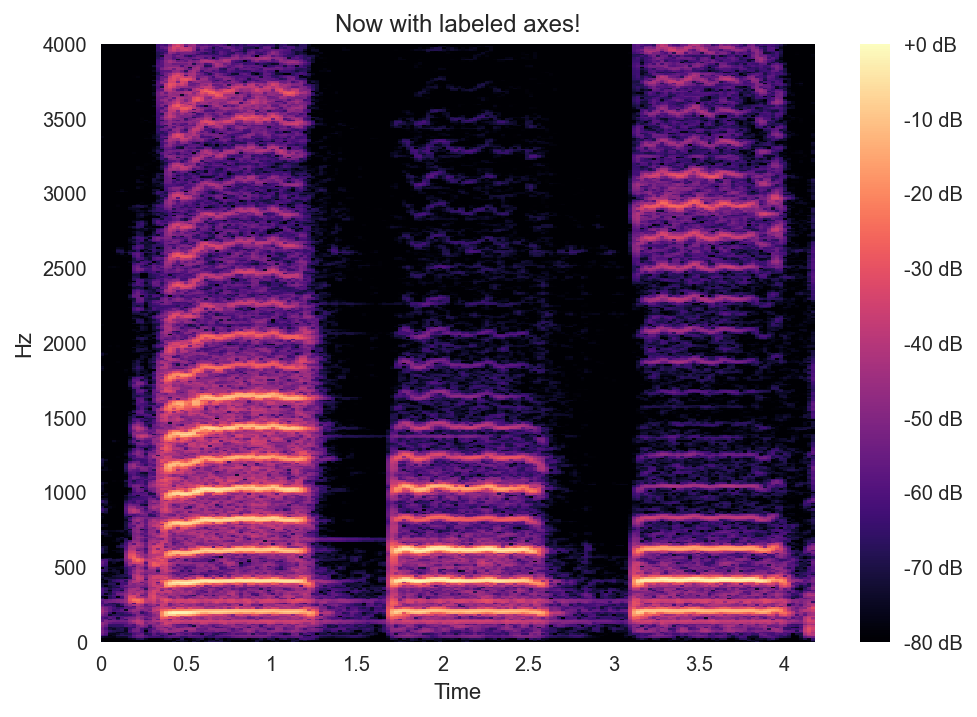

In [65]:




wav, sr = audio.load_wav('/Users/nemo/Downloads/a_y_i_2.m4a', sr=16000)
D = librosa.stft(wav, n_fft=2048)  # STFT of y
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, x_axis='time', y_axis='linear', ax=ax)
ax.set(title='Now with labeled axes!')
fig.colorbar(img, ax=ax, format="%+2.f dB")
plt.ylim([0, 4000])
plt.show()